#### 분류 문제의 평가 방법 - 샘플 코드

In [1]:
from sklearn.datasets import load_breast_cancer

# 유방암 진단 데이터세트 불러오기
data = load_breast_cancer()

# 특징 데이터 생성
X = data.data

# 종속 변수 생성. 악성 발견이 목적이므로 레이블의 0과 1을 바꿈
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 줄임
X = X[:, :10]

from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver='lbfgs')

model_lor.fit(X, y)           # 학습
y_pred = model_lor.predict(X) # 예측

#### 혼동 행렬 - 샘플 코드

In [2]:
from sklearn.metrics import confusion_matrix

# 종속 변수와 예측 결과로 혼동 행렬 생성
cm = confusion_matrix(y, y_pred)

print(cm)

[[337  20]
 [ 30 182]]


#### 정확도 - 샘플 코드

In [3]:
from sklearn.metrics import accuracy_score

# 종속 변수와 예측 결과로 정확도 계산
print(accuracy_score(y, y_pred))

0.9121265377855887


#### 정밀도 - 샘플 코드

In [4]:
from sklearn.metrics import precision_score

# 종속 변수와 예측 결과로 정밀도 계산
print(precision_score(y, y_pred))

0.900990099009901


#### 재현율 - 샘플 코드

In [5]:
from sklearn.metrics import recall_score

# 종속 변수와 예측 결과로 재현율 계산
print(recall_score(y, y_pred))

0.8584905660377359


#### F값 - 샘플 코드

In [6]:
from sklearn.metrics import f1_score

# 종속 변수와 예측 결과로 F값 계산
print(f1_score(y, y_pred))

0.8792270531400966


#### 예측 확률 - 샘플 코드 1

In [7]:
# 특징 데이터의 예측 확률 계산
model_lor.predict_proba(X)

array([[7.67416961e-03, 9.92325830e-01],
       [2.03140599e-02, 9.79685940e-01],
       [2.34637374e-03, 9.97653626e-01],
       ...,
       [2.35217086e-02, 9.76478291e-01],
       [8.13271338e-06, 9.99991867e-01],
       [9.99572336e-01, 4.27663645e-04]])

#### 예측 확률 - 샘플 코드 2

In [8]:
import numpy as np

# 예측 확률 중 두 번째 요소가 10% 이상인 값 개수를 np.int 타입으로 변환해 저장
y_pred2 = (model_lor.predict_proba(X)[:, 1]>0.1).astype(np.int)

# 종속 변수와 예측 확률로 혼동 행렬 생성
print(confusion_matrix(y, y_pred2))

[[267  90]
 [  6 206]]


#### 예측 확률 - 샘플 코드 3

In [9]:
# 종속 변수와 예측 확률로 정확도를 계산해 출력
print(accuracy_score(y, y_pred2))

# 종속 변수와 예측 확률로 재현율을 계산해 출력
print(recall_score(y, y_pred2))

0.8312829525483304
0.9716981132075472


#### ROC 곡선과 곡선아래면적 - 샘플 코드 1

In [10]:
from sklearn.metrics import roc_curve

# 유방암 진단 데이터세트 특징 데이터의 예측 확률 계산
probas = model_lor.predict_proba(X)

# 종속 변수와 예측 확률의 두 번째 요소로 ROC 곡선을 생성하고 위양성률, 진양성률, 기준값 저장
fpr, tpr, thresholds = roc_curve(y, probas[:, 1])

#### ROC 곡선과 곡선아래면적 - 샘플 코드 2

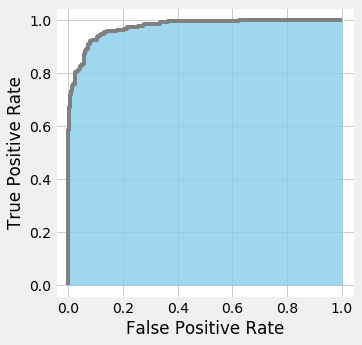

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

# ROC 곡선의 그래프 영역 스타일 지정
plt.style.use('fivethirtyeight')

# 캔버스와 좌표 평면 생성
fig, ax = plt.subplots()

# 그래프 영역의 크기 설정
fig.set_size_inches(4.8, 5)

# 그래프의 선을 이루는 값과 선 색상 설정
ax.step(fpr, tpr, 'gray')

# 그래프의 선을 기준으로 곡선아래면적을 skyblue로 채우도록 설정
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)

# x축 레이블 설정
ax.set_xlabel('False Positive Rate')

# y축 레이블 설정
ax.set_ylabel('True Positive Rate')

# 그래프 영역 배경색 설정
ax.set_facecolor('xkcd:white')

# 최종 그래프 생성
plt.show()

#### ROC 곡선과 곡선아래면적 - 샘플 코드 3

In [12]:
from sklearn.metrics import roc_auc_score

# 종속 변수와 예측 확률의 두 번째 요소로 곡선아래면적 계산
roc_auc_score(y, probas[:, 1])

0.9741557000158554

#### 회귀 문제의 평가 방법 - 샘플 코드 1

In [13]:
from sklearn.datasets import load_boston

# 보스턴 주택 가격 데이터 세트 불러오기
data = load_boston()

# RM 열만 있는 특징 데이터 생성
X = data.data[:, [5, ]]

# 종속 변수 생성
y = data.target

#### 회귀 문제의 평가 방법 - 샘플 코드 2

In [14]:
from sklearn.linear_model import LinearRegression

# 선형회귀 모델 생성
model_lir = LinearRegression()

model_lir.fit(X, y)           # 학습
y_pred = model_lir.predict(X) # 예측

#### 회귀 문제의 평가 방법 - 샘플 코드 3

In [15]:
print(model_lir.coef_)      # 기울기 출력
print(model_lir.intercept_) # 절편 출력

[9.10210898]
-34.67062077643857


#### 회귀 문제의 평가 방법 - 샘플 코드 4

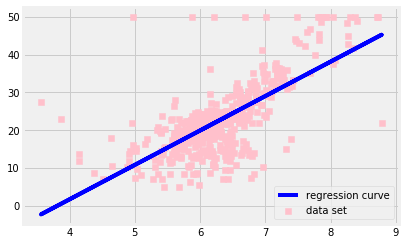

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

# 캔버스와 좌표 평면 생성
fig, ax = plt.subplots()

# 특징과 종속 변수로 data set라는 레이블을 설정한 분홍색 산점도 출력
ax.scatter(X, y, color='pink', marker='s', label='data set')

# 특징과 예측 결과로 regresssion curve라는 레이블을 설정한 파란색 회귀선 생성
ax.plot(X, y_pred, color='blue', label='regression curve')

# 레이블 배치
ax.legend()

# 최종 그래프 생성
plt.show()

#### 평균제곱오차 - 샘플 코드

In [17]:
from sklearn.metrics import mean_squared_error

# 종속 변수와 예측 결과로 평균제곱오차 계산
print(mean_squared_error(y, y_pred))

43.60055177116956


#### 결정계수 - 샘플 코드

In [18]:
from sklearn.metrics import r2_score

# 종속 변수와 예측 결과로 결정계수 계산
print(r2_score(y, y_pred))

0.48352545599133423


#### 다른 알고리즘을 이용할 때와 비교 - 샘플 코드 1

In [19]:
from sklearn.svm import SVR

# 서포트 벡터 회귀 모델을 생성
model_svr_linear = SVR(C=0.01, kernel='linear')

model_svr_linear.fit(X, y) # 학습
y_svr_pred = model_svr_linear.predict(X) # 예측

#### 다른 알고리즘을 이용할 때와 비교 - 샘플 코드 2

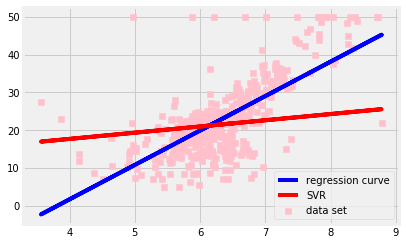

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

# 캔버스와 좌표 평면 생성
fig, ax = plt.subplots()

# 특징과 종속 변수로 data set라는 레이블을 설정한 분홍색 산점도 출력
ax.scatter(X, y, color='pink', marker='s', label='data set')

# 특징과 선형회귀 예측 결과로 regresssion curve라는 레이블을 설정한 파란색 회귀선 생성
ax.plot(X, y_pred, color='blue', label='regression curve')

# 특징과 서포트 벡터 회귀 예측 결과로 SVR이라는 레이블을 설정한 붉은색 회귀선 생성
ax.plot(X, y_svr_pred, color='red', label='SVR')

ax.legend()

plt.show()

#### 다른 알고리즘을 이용할 때와 비교 - 샘플 코드 3

In [21]:
print(mean_squared_error(y, y_svr_pred)) # 평균제곱오차 출력
print(r2_score(y, y_svr_pred))           # 결정계수 출력
print(model_svr_linear.coef_)            # 기울기 출력
print(model_svr_linear.intercept_)       # 절편 출력

72.14197118147209
0.14543531775956597
[[1.64398]]
[11.13520958]


#### 하이퍼 파라미터 설정 - 샘플 코드

In [22]:
# C와 kernel 인잣값을 바꾸고 gamma 인자를 추가해 서포트 벡터 회귀 모델 생성
model_svr_rbf = SVR(C=1.0, kernel='rbf', gamma='auto')

model_svr_rbf.fit(X, y) # 학습
y_svr_pred = model_svr_rbf.predict(X) # 예측

print(mean_squared_error(y, y_svr_pred)) # 평균제곱오차 출력
print(r2_score(y, y_svr_pred))           # 결정계수 출력

36.42126375260171
0.5685684051071418


#### 모델의 과적합 - 샘플 코드

In [23]:
# 특징의 학습 데이터와 검정 데이터 생성
train_X, test_X = X[:400], X[400:]

# 종속 변수의 학습 데이터와 검정 데이터 생성
train_y, test_y = y[:400], y[400:]

# 서포트 벡터 회귀 모델 생성
model_svr_rbf_1 = SVR(C=1.0, kernel='rbf', gamma='auto')

model_svr_rbf_1.fit(train_X, train_y)         # 학습
test_y_pred = model_svr_rbf_1.predict(test_X) # 특징의 검정 데이터로 예측

print(mean_squared_error(test_y, test_y_pred)) # 평균제곱오차 출력
print(r2_score(test_y, test_y_pred))           # 결정계수 출력

69.16928620453004
-1.4478345530124388


#### 학습 데이터와 검정 데이터 나누기 - 샘플 코드 1

In [24]:
from sklearn.datasets import load_breast_cancer

# 유방암 진단 데이터세트 불러오기
data = load_breast_cancer()

# 특징 데이터 생성
X = data.data

# 종속 변수 데이터 생성
y = data.target

from sklearn.model_selection import train_test_split

# 특징과 종속 변수 데이터를 학습 데이터와 검정 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 학습 데이터와 검정 데이터 나누기 - 샘플 코드 2

In [25]:
from sklearn.svm import SVC

# 서포트 벡터 머신 모델 생성
model_svc = SVC(gamma='auto')

model_svc.fit(X_train, y_train) # 학습

# 학습 데이터의 특징으로 예측
y_train_pred = model_svc.predict(X_train)

 # 검정 데이터의 특징으로 예측
y_test_pred = model_svc.predict(X_test)

from sklearn.metrics import accuracy_score

# 학습 데이터의 종속 변수와 예측 결과로 정확도 계산
print(accuracy_score(y_train, y_train_pred))

# 검정 데이터의 종속 변수와 예측 결과로 정확도 계산
print(accuracy_score(y_test, y_test_pred))

1.0
0.6081871345029239


#### 학습 데이터와 검정 데이터 나누기 - 샘플 코드 3

In [26]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성
model_rfc = RandomForestClassifier(n_estimators=10)

model_rfc.fit(X_train, y_train) # 학습

# 학습 데이터의 특징으로 예측
y_train_pred = model_rfc.predict(X_train)

# 검정 데이터의 특징으로 예측
y_test_pred = model_rfc.predict(X_test)

from sklearn.metrics import accuracy_score

# 학습 데이터의 종속 변수와 예측 결과로 정확도 계산
print(accuracy_score(y_train, y_train_pred))

# 검정 데이터의 종속 변수와 예측 결과로 정확도 계산
print(accuracy_score(y_test, y_test_pred))

0.9949748743718593
0.9415204678362573


#### 교차 검증 - 샘플 코드 1

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# 학습 및 검정 데이터를 대상으로 패턴 5개 생성
cv = KFold(5, shuffle=True)

# 랜덤 포레스트 모델 생성
model_rfc_1 = RandomForestClassifier(n_estimators=10)

# 교차 검증을 반복해 정확도 계산
cross_val_score(model_rfc_1, X, y, cv=cv, scoring='accuracy')

array([0.94736842, 0.93859649, 0.92982456, 0.93859649, 0.96460177])

#### 교차 검증 - 샘플 코드 2

In [28]:
cross_val_score(model_rfc_1, X, y, cv=cv, scoring='f1')

array([0.97183099, 0.97101449, 0.96350365, 0.95302013, 0.96644295])

#### 그리드 탐색으로 하이퍼 파라미터 선택하기 - 샘플 코드 1

In [29]:
from sklearn.datasets import load_breast_cancer

# 유방암 진단 데이터세트 불러오기
data = load_breast_cancer()

# 특징 데이터 생성
X = data.data

# 종속 변수 생성. 레이블의 0과 1을 바꿈
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 줄임
X = X[:, :10]

#### 그리드 탐색으로 하이퍼 파라미터 선택하기 - 샘플 코드 2

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# 학습 및 검정 데이터를 대상으로 패턴 5개 생성
cv = KFold(5, shuffle=True)

# 그리드 탐색할 하이퍼 파라미터 목록 설정
param_grid = {'max_depth': [5, 10, 15], 'n_estimators': [10, 20, 30]}

# 랜덤 포레스트 모델 생성
model_rfc_2 = RandomForestClassifier()

# 그리드 탐색으로 하이퍼 파라미터 조합 탐색
grid_search = GridSearchCV(model_rfc_2, param_grid, cv=cv, scoring='accuracy')

# 탐색한 하이퍼 파라미터로 학습
grid_search.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                   

#### 그리드 탐색으로 하이퍼 파라미터 선택하기 - 샘플 코드 3

In [31]:
# 가장 좋은 정확도 출력
print(grid_search.best_score_)

# 가장 좋은 정확도일 때 하이퍼 파라미터값 출력
print(grid_search.best_params_)

0.9472759226713533
{'max_depth': 5, 'n_estimators': 30}


#### 그리드 탐색으로 하이퍼 파라미터 선택하기 - 샘플 코드 4

In [32]:
# 성능을 평가하는 방법을 F값으로 변경
grid_search = GridSearchCV(model_rfc_2, param_grid, cv=cv, scoring='f1')

#### 머신러닝 모델에 적용 - 샘플 코드 1

In [33]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.datasets import fetch_20newsgroups

# 문서 데이터로 사용할 뉴스 그룹 테마 설정
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# 본문 이외의 뉴스 그룹 게시물 데이터 제거
remove = ('headers', 'footers', 'quotes')

# 학습 데이터 설정
twenty_train = fetch_20newsgroups(subset='train', remove=remove, categories=categories)

# 검정 데이터 설정
twenty_test = fetch_20newsgroups(subset='test', remove=remove, categories=categories)

#### 머신러닝 모델에 적용 - 샘플 코드 2

In [34]:
# 문서 데이터를 단어 빈도 수로 변환하는 모델 생성
count_vect = CountVectorizer()

# 학습 데이터에서 단어 빈도 수의 특징을 생성하고 학습 후 변환
X_train_counts = count_vect.fit_transform(twenty_train.data)

# 검정 데이터에서 단어 빈도 수의 특징을 생성하고 검정 후 변환
X_test_count = count_vect.transform(twenty_test.data)

# 선형 서포트 벡터 머신 모델 생성
model = LinearSVC(max_iter=20000)

# 학습 데이터의 단어 빈도 수 특징과 종속 변수로 학습
model.fit(X_train_counts, twenty_train.target)

# 검정 데이터의 단어 빈도수 특징으로 예측
predicted = model.predict(X_test_count)

# 예측 결과와 학습 데이터의 종속 변수가 같을 때의 평균 계산
print(np.mean(predicted == twenty_test.target))

0.7423435419440746


#### 머신러닝 모델에 적용 - 샘플 코드 3

In [35]:
# 문서 데이터를 TF-IDF로 변환하는 모델 생성
tf_vec = TfidfVectorizer()

# 학습 데이터에서 TF-IDF의 특징을 생성하고 학습 후 변환
X_train_tfidf = tf_vec.fit_transform(twenty_train.data)

# 검정 데이터에서 TF-IDF의 특징을 생성하고 검정 후 변환
X_test_tfidf = tf_vec.transform(twenty_test.data)

# 선형 서포트 벡터 머신 모델 생성
model = LinearSVC(max_iter=20000)

# 학습 데이터의 TF-IDF 특징과 종속 변수로 학습
model.fit(X_train_tfidf, twenty_train.target)

# 검정 데이터의 TF-IDF 특징으로 예측
predicted = model.predict(X_test_tfidf)

# 예측 결과와 학습 데이터의 종속 변수가 같을 때의 평균 계산
print(np.mean(predicted == twenty_test.target))

0.8149134487350199


#### 픽셀 밝기 정보로 사용하는 숫자를 그대로 활용 - 샘플 코드

In [36]:
from PIL import Image
import numpy as np

# 이미지 데이터 불러오기
img = Image.open('zero_image.png').convert('L')

# 이미지 데이터의 가로와 세로 픽셀 크기 저장
width, height = img.size

# 벡터 데이터를 넘파이의 배열 타입으로 저장할 변수 정의
img_pixels = []

for y in range(height):
    for x in range(width):
        # getpixel 함수로 지정한 위치의 픽셀 밝기 값 얻음
        img_pixels.append(img.getpixel((x, y)))

# 픽셀 밝기 값 출력
print(img_pixels)

[255, 255, 170, 34, 102, 238, 255, 255, 255, 255, 34, 0, 85, 0, 170, 255, 255, 204, 0, 221, 255, 68, 119, 255, 255, 187, 51, 255, 255, 119, 119, 255, 255, 170, 119, 255, 255, 102, 119, 255, 255, 187, 68, 255, 238, 51, 136, 255, 255, 221, 17, 170, 85, 51, 255, 255, 255, 255, 153, 34, 85, 255, 255, 255]


#### 변환한 벡터 데이터를 머신러닝 모델에 적용하기 - 샘플 코드

In [37]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# 흑백 필기체 숫자 이미지 데이터 불러오기
digits = datasets.load_digits()

# 이미지 데이터 개수를 n_samples에 저장
n_samples = len(digits.images)

# 모든 이미지 데이터의 픽셀 밝기 값을 행 벡터로 만들어 data에 저장
data = digits.images.reshape((n_samples, -1))

# 랜덤 포레스트 모델 생성
model = RandomForestClassifier(n_estimators=10)

# 전체 이미지 데이터의 절반에서 특징과 종속 변수를 설정해 학습
model.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# 종속 변수를 expected에 저장
expected = digits.target[n_samples // 2:]

# 특징으로 예측한 결과를 predicted에 저장
predicted = model.predict(data[n_samples // 2:])

# 종속 변수와 예측 결과를 이용해 정밀도, 재현율, F값을 계산해 출력
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.91      0.93      0.92        91
           2       0.92      0.93      0.92        86
           3       0.85      0.91      0.88        91
           4       0.89      0.92      0.90        92
           5       0.83      0.81      0.82        91
           6       0.91      0.99      0.95        91
           7       0.97      0.93      0.95        89
           8       0.92      0.77      0.84        88
           9       0.89      0.84      0.86        92

    accuracy                           0.90       899
   macro avg       0.90      0.90      0.90       899
weighted avg       0.90      0.90      0.90       899

